In [2]:
import random
import sys
from sage.combinat.matrices.hadamard_matrix import is_hadamard_matrix
import itertools
import warnings

def matrixCopy(M):
    n = len(M.rows())
    m = len(M.columns())
    Mcopy = matrix(n,m)
    for i in range(0,n):
        Mcopy[i] = M[i]
    return Mcopy

def shuffleMatrix(M, numShuffles):
    H = matrixCopy(M)
    n = len(H.rows())
    m = len(H.columns())
    for _ in range(numShuffles):
        i = random.choice([0,1,2])
#         print(i)
        # multiply a row by -1
        if i == 0:
            row = list(random.sample(range(0,n),1))[0]
            H[row] = -1*H[row]
        # switch two rows
        elif i == 1:
            choices = list(random.sample(range(0,n),2))
            row1,row2 = choices[0],choices[1]
            row1data = H[row1]
            row2data = H[row2]
            H[row1] = row2data
            H[row2] = row1data
        # switch two columns
        elif i == 2:
            H = H.transpose()
            choices = list(random.sample(range(0,m),2))
            column1,column2 = choices[0],choices[1]
            column1data = H[column1]
            column2data = H[column2]
            H[column1] = column2data
            H[column2] = column1data
            H = H.transpose()
    return H

# only 3 possibilities: 0, 1, or 2 isolated vertices
def findBalancedBipartition(G):
    iso = [v for v in G.vertices() if G.degree(v)==0]
    Gcopy = G.copy()
    Gcopy.delete_vertices(iso)
    leftPart,rightPart = Gcopy.bipartite_sets()
    leftPart = list(leftPart)
    rightPart = list(rightPart)
    # if no iso
    if len(leftPart) == len(rightPart) and len(iso) == 0:
        return leftPart,rightPart
    # if 1 iso
    elif len(leftPart) == len(rightPart)+1 and len(iso) == 1:
        rightPart.append(iso[0])
        return leftPart, rightPart
    elif len(rightPart) == len(leftPart)+1 and len(iso) == 1:
        leftPart.append(iso[0])
        return leftPart, rightPart
    # if 2 iso
    elif len(leftPart) == len(rightPart) and len(iso) == 2:
        leftPart.append(iso[0])
        rightPart.append(iso[1])
        return leftPart, rightPart
    else:
        return False

def isHadamardBipartite(G):
    bip = findBalancedBipartition(G)
    if not bip:
        return False
    leftPart,rightPart = bip[0],bip[1]
    for u,v in itertools.combinations(leftPart,2):
        vNeigh = Set(G.neighbors(v))
        uNeigh = Set(G.neighbors(u))
        vNonNeigh = Set(rightPart).difference(vNeigh)
        uNonNeigh = Set(rightPart).difference(uNeigh)
        n = len(leftPart)
        if (len(vNeigh.intersection(uNeigh)) + len(vNonNeigh.intersection(uNonNeigh)) != n/2):
            return False
    return True

def bipartiteToHadamard(G):
    try:
        G.bipartite_sets()
    except:
        return False
    Gcopy = G.copy()
    A = findBalancedBipartition(Gcopy)
    if not A:
        return False
    else:
        leftPart, rightPart = A[0],A[1]
    i = 0
    for v in leftPart:
        Gcopy.relabel({v:(0,i)})
        i += 1
    i = 0
    for v in rightPart:
        Gcopy.relabel({v:(1,i)})
        i += 1
    n = len(leftPart)
    M = matrix([[-1]*n]*n)
    # set entry [i][j] to 1 if edge (0,i),(1,j) is in G
    for e in Gcopy.edges():
        M[e[0][1], e[1][1]] = 1
    return M

def viewAsBip(M):
    #start with 2n vertices
    n = M.nrows()
    G = Graph(2*n)
    #add a A-to-B edge if 1 in matrix
    for i in range(n):
        for j in range(n):
            if M[i, j] ==1:
                G.add_edge(i,j+n)
    return(G)

In [1]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

obj = load("hadamardeightgraphs.sobj")

graphList = []

for i in obj:
    M = bipartiteToHadamard(i)
    shuffleM = shuffleMatrix(M, random.randint(900, 1337))
    
    G = mGraph(shuffleM) #Mckay Graph
    #G = viewAsBip(shuffleM) #VB Hadamard Graphs
    
    isomorphic = False
    for j in graphList:
        if(j.is_isomorphic(G)):
            isomorphic = True
            
    if(not isomorphic):
        graphList.append(G)
    
for i in graphList:
    B = BipartiteGraph(i)
    P = B.plot()
    show(P)
 

NameError: name 'bipartiteToHadamard' is not defined

In [3]:
#Hadamard Matrix to Mckay Graph
def mGraph(M):
    n = M.nrows()
    G = Graph(4*n)
    
    for i in range(n):
        for j in range(n):
            if M[i, j] == 1:
                G.add_edge(i,j+n)
                G.add_edge(i + (2*n) , (j+n) + (2*n))
            else:
                G.add_edge(i,(j+n) + (2*n))
                G.add_edge( (i + (2*n)) , j+n )
    return G

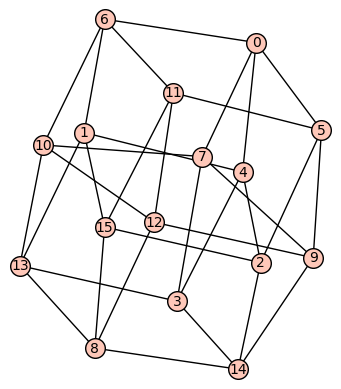

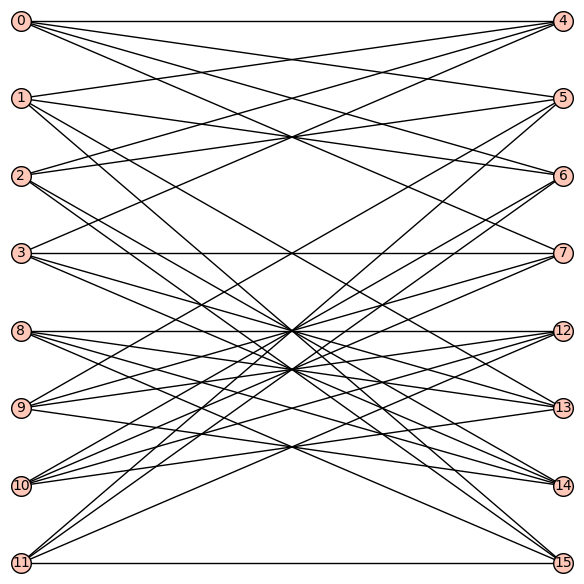

In [19]:
M = hadamard_matrix(4)
show(mGraph(M))
B = BipartiteGraph(mGraph(M))
B.plot()
